# Data Visualisation Basics

### A basic Python toolkit

For a data scientist working in Python/Pandas, there are two principal visualisation tools.

One of these tools is the built-in Pandas plotting capabilities. These are convenient built-in methods, which make it easy to create quick plots from Pandas dataframes, without much code. We have already previewed these in the first section, and we will see them more below.

However, we will emphasise examples of creating plots using the Matplotlib plotting library. Matplotlib is the most widely-used and general-purpose Python visualisation library, and perhaps the most powerful. As such, it is important to get to grips with, and a great way to learn the fundamentals of Python visualisation (later, we'll also discuss other visualisation libraries and tools, in Python and beyond).

So, how do we use these tools to make data visualisations? And how do we make *good* data visualisations?

Today's workbooks will look at some basic answers to these questions, and on Tuesday we will delve into some more advanced examples. 

Throughout, you should execute the code cells, and try to solve any errors that you run into.

### Where do I start with data visualisation?

The general answer here is to be guided by your data: choosing a type of visualisation that suits your data, and your purpose in visualising it, is crucial. This course will give you examples of important types of visualisation, and discuss what they are best suited for. 

Some of the major considerations here include:

* Is your data qualitative, or quantitative? 
* If quantitative, is your data continuous or discrete?
* What inherent relationships exist in the data?

Typically, guides to data visualisation focus principally on quantitiative data. This is not to say you can't make great figures using qualitative data! However, such visualisations are often more appropriately classified as "information visualisations" or "information graphics". Although the distinction is a blurry one, these graphics (for example, flow charts, mind maps, dendrograms, and most types of "diagrams") are usually considered separately to from data visualisation/scientific visualisation.

Accordingly, this discussion will focus on examples using quantitative data. We will use data from the City of Melbourne's Open Data Portal to demonstrate various key types of visualisation, and when they should be used.


### Scatter Plots - Part I

A scatter plot is one of the simplest, but most powerful, types of visualisation. A scatter plot represents the relationship between two variables, x and y, by marking points on a (usually) Cartesian plane. 

A point is marked at the coordinate ($x_{i}, y_{i}$), for each row $i$ in your data set.

A scatter plot is suitable for any two variables x and y - but particularly suitable for discrete data.

By inspecting the distribution of the points, we can infer what relationship (if any) exists between x and y. This is the approach we used in the last notebook, to identify different relationships between the four datasets of Anscombe's Quartet.

This time, let's take some example data from the City of Melbourne CLUE survey, which profiles various Melbourne suburbs on key demographic and social indicators.


In [2]:
%matplotlib inline 

import pandas as pd

df1 = pd.read_csv('CLUE_age_vs_household_income_2016.csv')

display(df1)

,geography,Median age,Median weekly household income
0,Carlton,25.97,734.71
1,Docklands,31.76,1870.17
2,East Melbourne,40.14,2386.03
3,Greater Melbourne,36.00,1542.00
4,Kensington,33.37,1909.37
5,Melbourne (CBD),26.29,959.83
6,City of Melbourne,28.00,1354.00
7,North Melbourne,28.79,1275.52
8,Parkville,31.22,1642.33
9,South Yarra (inc. Melbourne Remainder),38.79,2052.48


We can plot the relationship between a suburb's median age and median weekly household income using Pandas' built-in 'scatter' function, which we met in the introductory notebook. Refresh your memory by giving it a try:

<AxesSubplot:xlabel='Median age', ylabel='Median weekly household income'>

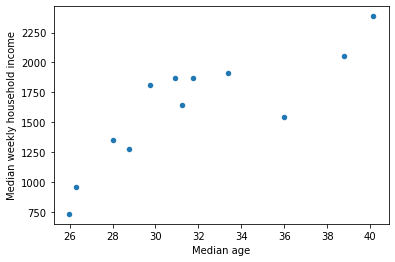

In [3]:
# Use panda's plot.scatter function to plot df1's median age vs median weekly household income here
df1.plot.scatter (x='Median age', y='Median weekly household income')

This simple one-liner lets us see quite a distinct correlation between our two variables: a suburb's median income tends to grow in proportion to that suburb's median age. 

This makes sense when we think about it: generally speaking, the older a working-age person is, the more time they have had to progress in their careers and increase their income. So, we can postulate a causative relationship between these two variables: one's age is partially explanatory of their income - or, if you like, one's income is partially dependent on one's age. However, one's age is not explained by (is independent of) their income. 

In cases like this, where we know or expect that there will be a dependence or causative relationship between our variables, we customarily place the **independent (explanatory) variable on the x axis**, and the **dependent variable on the y axis**. This is true for most kinds of cartesian plots, not just scatter plots, as we will see below. 

Of course, it is also worth noting that we can create plots using x and y variables which are both independent of the other. In this case, it doesn't really matter which variable you place on which axis. 

### Matplotlib 

Having made the last plot with a single simple line of code, it might seem strange to look for a more complicated way to achieve the same result. 

However, we'll now attempt to recreate the plot above using Python's Matplotlib library. Using Matplotlib directly will give us the tools to build powerful figures, and make them look exactly as we wish - going beyond the capabilities of Pandas built-ins. Note that Matplotlib has similar capabilities (and syntax) to plotting in MATLAB, for those who may be familiar with it.

Matplotlib should come packaged with almost any Python installation. We can import it, and get access to its user interface, "pyplot", using:

In [4]:
import matplotlib.pyplot as pl

Some installations might prefer you to use ``pylab``" instead (``import matplotlib.pylab as pl``). Pylab is basically just pyplot packaged together with numpy. If importing pyplot fails, you may find that pylab is installed. However, it is no longer recommded to use pylab - you should prefer pyplot wherever possible.

Matplotlib's pyplot namespace (usually imported as ``pl`` or ``plt``) contains a vast array of plotting capabilities. 

In the interest of starting with something familiar, we'll look first at ``pl.scatter()``, for creating scatter plots

### Scatter Plots - Part II

Matplotlib's ``pl.scatter()`` function requires two arguments: the vector of x co-ordinates for the desired points, and the vector of y co-ordinates for the desired points. These can be passed as arrays, lists, dataframe columns, etc. Other optional arguments can also be passed: we'll talk about them later. 

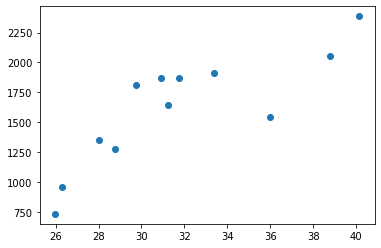

In [5]:
#Based on the above remarks, alter the line below to plot median age against median income:

pl.scatter(df1['Median age'], df1['Median weekly household income'] );

You'll notice that this output looks almost identical to the scatter plot achieved with Pandas. This is because **Pandas' built-ins are simply a high-level wrapper for Matplotlib's functions**. So, although being familiar with the built-in functions can be very convenient, it is important to make sure you understand their foundations - Matplotlib. 

### Basic Plot Labels

One difference you may have noticed between the two plots above is that second plot lacks the axis labels which were automatically provided by ``pd.plot.scatter()``. 

Using Matplotlib, we need to add axis labels manually. By contrast, Pandas infers the axis labels from the names of the columns we pass as our ``x`` and ``y`` variables to ``pd.plot.scatter()``. There are pros and cons to both approaches.

Now we'll see how to add axis labels, and plot titles. 

To change the x-axis label, we use a simple command. Give the below a try.

Text(0.5, 0, 'My x-axis label')

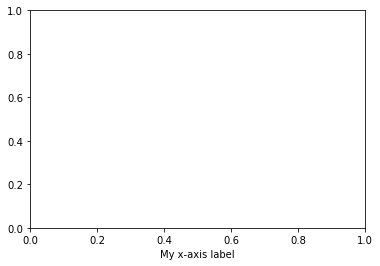

In [6]:
# Try this

pl.xlabel('My x-axis label')

Ok, we've added an x-axis label, but it's labelling a new, empty plot - what's going on?

### Introduction to Python Figure & Plotting Objects

Our visualisations are made up of many elements - the axes, the axes labels, the plotting area, plotted data itself, and more. Matplotlib's "Figure" class defines a type of object (a figure), which acts as a container for all these other elements.

A figure object doesn't look like much on its own: try initialising this one.

In [7]:
pl.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

However, when a code first executes a plotting command, Python automatically initialises one of these figure objects behind the scenes. Alternatively, we can choose to initalise a figure manually ourselves before we begin plotting - using the command in the previous cell.

Either way, **the figure object acts as a container for all the other elements that will make up our visualisations**. 

When we run any Matplotlib commands, this figure object (which just exists in memory for now) is populated (in memory) with the associated details: axes, data, etc. 

Then, once all plotting commands are complete, the visualisation which the figure object describes is rendered to your screen as a graphic. We can tell Python that our plotting commands are complete (and generate our visualisation) by executing:

``pl.show()``

This will cause our visualisations to be rendered to the screen. Alternatively, if we're working in the notebook, any visualisations we create within a single cell are automatically rendered and displayed when we execute that cell - as we have been doing above. 

Typically, once a figure is displayed, it can't be changed*; so we would usually put all the commands we need to create and customise our plots within a single notebook cell. Let's have a go at plotting and labelling a figure in one fell swoop:

\* *Although, interactive figures will be covered later in the course*

Try the code below:

Text(0.5, 1.0, 'Age versus income plot')

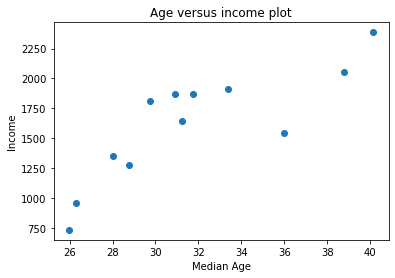

In [8]:
# First, we'll re-generate our plot from above: so that we are creating the plot object and adding labels in the same cell.
# Python will first generate our figure object; then, it will add the required axes and data points in memory 

pl.scatter(df1['Median age'], df1['Median weekly household income'])

# Now we have our plot objects in memory, we apply our changes (addition of labels) to that object. Make sure you label both axes.

pl.xlabel('Median Age')
pl.ylabel('Income')

# While we're here, we'll also add a title to the plot. Pass your desired title as a string to the following function:

pl.title( 'Age versus income plot'  )

# Only once all the cell's contents are run is the figure object rendered to a graphic and displayed.
# The figure will be generated with the labels we specified

Great! There are a few aesthetic elements of this plot we might like to tweak later, but the essentials are there.

Here is a nice figure (from https://matplotlib.org/3.2.1/gallery/showcase/anatomy.html) showing the major parts of a Matplotlib/Python figure. Each of these elements - and many more!! - can be customised with code, so you can usually produce almost any visual effect you are after in a graphic.

![alt text](sphx_glr_anatomy_001.png "Title")


### A quick diversion - simple linear regression

When we look at a scatter plot, and can see evidence for a relationship between our variables, a common next task is to fit a line to our data.

This is a useful skill to have, and a useful way to jump to discussing line graphs. So let's take a look at a basic example. 

Note that the following code snippet will gloss over the details of the linear regression calculation, and the use of the new 'scikitlearn' library (a useful one), in the interests of moving along with visualisation. So, **you don't need to understand everything that's happening in the next cell: and you won't need to fix anything. You can just run it and move on!** If there is time, and interest, we can revisit this at the end of the session. But it is mostly here just as a cool example of a data science task we can do easily with python, and - most importantly - to give us the values for our line. **Don't worry too much about the details.**

In [9]:
# First, we import the 'ScikitLearn' linear regression function - a common choice for basic fitting
from sklearn.linear_model import LinearRegression

# The linear regression function doesn't accept dataframe columns/Series as inputs
# We first need to reshape our data from an X-length Series into numpy arrays of shape (X,1)

import numpy as np

age_input = np.array( df1['Median age'] ).reshape(-1,1)
income_input = np.array( df1['Median weekly household income'] ).reshape(-1,1)

# We now perform the linear regression based on these inputs
regression_model = LinearRegression().fit( age_input, income_input )

# Once we have our regression model, we can use it to predict expected incomes, based on age
predicted_incomes = ( regression_model.predict( age_input ) )

print(predicted_incomes)


[[1124.793494  ]
 [1618.2173835 ]
 [2332.36111304]
 [1979.55024904]
 [1755.42160839]
 [1152.06389895]
 [1297.79012538]
 [1365.11393759]
 [1572.19857515]
 [2217.31409217]
 [1547.48477067]
 [1445.22075212]]


In [10]:
# Let's take a look at the predictions for income vs age:

# First, add 'predicted incomes' to df1 as a new column, then print the result.

# Your code here...

df1['Predicted income'] = predicted_incomes
display(df1)

,geography,Median age,Median weekly household income,Predicted income
0,Carlton,25.97,734.71,1124.793494
1,Docklands,31.76,1870.17,1618.217384
2,East Melbourne,40.14,2386.03,2332.361113
3,Greater Melbourne,36.00,1542.00,1979.550249
4,Kensington,33.37,1909.37,1755.421608
5,Melbourne (CBD),26.29,959.83,1152.063899
6,City of Melbourne,28.00,1354.00,1297.790125
7,North Melbourne,28.79,1275.52,1365.113938
8,Parkville,31.22,1642.33,1572.198575
9,South Yarra (inc. Melbourne Remainder),38.79,2052.48,2217.314092


As we've discussed, it's not always easy to interpret data from written form like this. So let's try a new type of plot.

### Line Graphs

A line graph (or line plot) is quite similar to a scatter plot in many ways. It is a 2D visualisation which shows the relationship between two variables, ``x`` and ``y``. It is usually created from two vectors, which give the x and y coordinates of key points in the data. However, unlike a scatter plot, these points are joined by line segments.

Accordingly, a line graph is usually preferred when there is some kind of a coherent and continuous relationship between adjacent points, so it makes sense to link them visually. For example, where your data represents samples from a continuous function; chronologically ordered measurements of some value; or most any type of time series plot, a line plot makes it clear to your audience that a continuing series of some kind is represented. 

In this example, although our 'predicted income' data takes the form of discrete vector elements, these are representations/evaluations of the continuous linear function that is our line of best fit. 

This is in contrast to the scatter plots above, where our points represent disparate, unordered measurements from independent suburbs. 

Line plots can be generated in Pandas using the ``pd.plot()`` function, which is a wrapper for the more general Matplotlib function ``pl.plot()``. Let's make a Pandas example, where we now plot our suburb median age against our *predicted* median incomes.


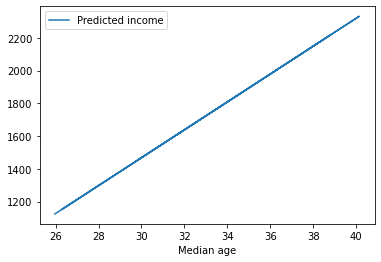

In [11]:
df1.plot(x = 'Median age', y = 'Predicted income');

In Matplotlib, this would be:

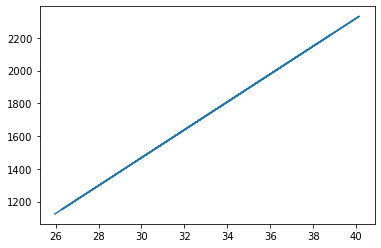

In [12]:
pl.plot( df1['Median age'], df1['Predicted income']);

We can see that Pandas has added some labelling for us. However, neither of these plots are very exciting, or very illuminating, as they stand - it's not very helpful to see a line of best fit separately than the points it has been fitted to.

It is much more interesting to plot the regression line *over* our scattered data points. This is easy to do: we simply make both plotting calls - i.e. to ``pl.scatter()`` and ``pl.plot()`` - *consecutively, in the same cell*, and both will be rendered to the same figure. Whichever we do first in the code will go "first" onto the figure; we'd like our line to go over the scattered points, so we'll do the line last.

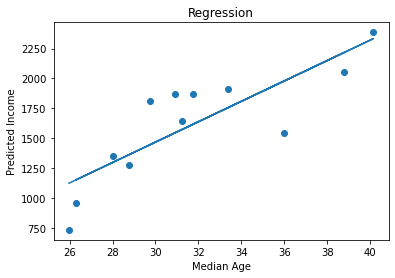

In [13]:
# First add the scatter plot - do this yourself here
pl.scatter( df1['Median age'], df1['Median weekly household income'] )

#Now add the regression line
pl.plot( df1['Median age'], df1['Predicted income'] )

pl.xlabel('Median Age')
pl.ylabel('Predicted Income')

pl.title('Regression');

### Customising Markers and Lines - Part I

For visual clarity, it is better if we change the colour of the fitted line, to distinguish it from the measured data points. We can change the colour of our line by providing a third argument, ``c``, to ``pl.plot(x,y)``, so it becomes ``pl.plot(x,y,c)``. ``c`` should (usually) be a string which defines the desired colour. 

The easiest colours to choose in Matplotlib are common ones, which have been given their own one-letter shortcuts:

* b: blue
* g: green
* r: red
* c: cyan
* m: magenta
* y: yellow
* k: black
* w: white

So, to plot a line in green, instead of the default blue, we would use:

``pl.plot( x, y, c='g')``

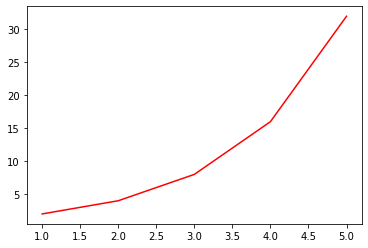

In [14]:
# For illustration purposes, let's define 

x = [1, 2, 3, 4, 5]
y = [2**i for i in x]

pl.plot(x, y, c = 'r');


This color specification is a typical Matplotlib syntax, and can also be applied to other plotting commands, such as scatter. To have our scatter points displayed in yellow instead of the default blue, we could use:

``pl.scatter( x, y, 'y')`` or ``pl.scatter( x, y, c='y')``


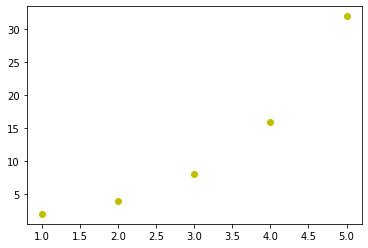

In [15]:
pl.scatter( x, y, c='y');


This is also a good place to mention changing the *shape* of our plotting markers. Like colours, Matplotlib has a few one-letter shortcuts for this. For example:

shortcut	description
* "."		point
* ","		pixel
* "o"		circle
* "v"		triangle_down
* "^"		triangle_up
* "s"       square

Find more at https://matplotlib.org/3.1.1/api/markers_api.html .

To change the colour and shape of a scatter plot marker, we use the format:

``pl.scatter( x, y, c='colour', marker='marker')``

So, to create a scatter plot with magenta triangles as a marker, we would use:


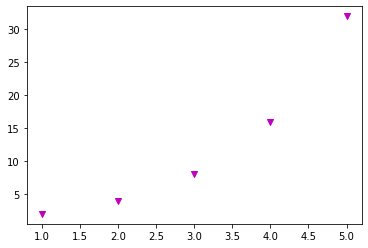

In [16]:
pl.scatter (x, y, c='m', marker='v' );

It's worth noting that ``pl.plot()`` does not *have* to be used to create line plots. Although a line plot is the default, we can pass ``pl.plot()`` a *marker* style as the third argument, to produce a scatter plot.

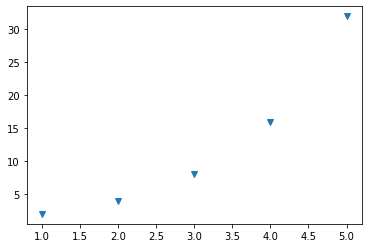

In [17]:
pl.plot(x, y, 'v');

In fact, using pl.plot(), we can change the marker *and* colour in a single argument, by combining a one-letter colour shortcut, and a one-letter marker shortcut into a single string. So, red ('r') circles ('o') would be achieved by the string 'ro', as below:

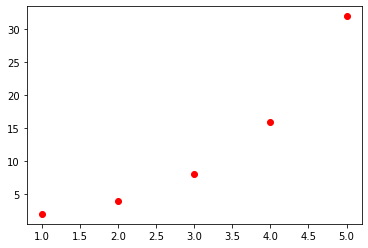

In [18]:
pl.plot(x, y, 'ro');

We can alter the linestyle used by pl.plot() with similar shortcuts:

* 'solid' or '-' for a solid line (the default)
* 'dashed' or '--' for a dashed line
* 'dashdot' or '-.' for a dashdotted line

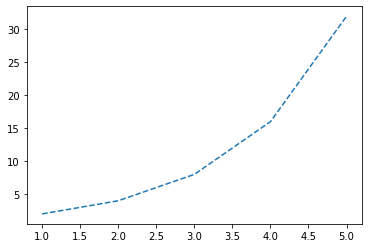

In [19]:
pl.plot(x,y,'--');

These, too, can be combined with colour options:

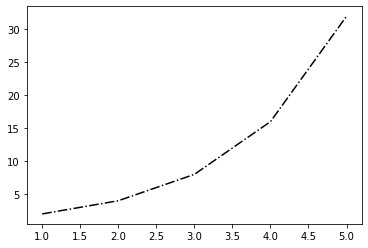

In [20]:
pl.plot(x,y,'k-.');

If you wish to use a non-shortcut linestyle argument (eg 'solid'), or combine a linestyle argument shortcut with a non-shortcut colour argument (such as 'indigo'), combining the strings will not work. You'll need to specify the colour and linestyle separately:

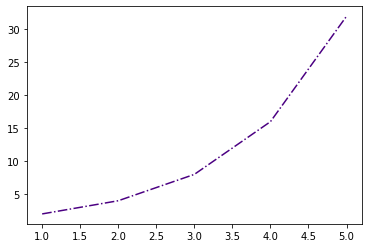

In [21]:
pl.plot(x, y, 'indigo',linestyle='dashdot');

For a range of further line options, see https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html .

Using this information, 
In the next cell, reproduce the last plot, but change the line of best fit to a dashed red line, and the scatter points to black squares:

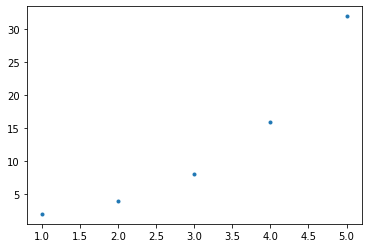

In [22]:
pl.plot(x,y,'.')

When we need colours beyond the above, a variety of options are available to us. For example, instead of a one-letter colour string, we can pass the name of a CSS colour from the extensive list at https://matplotlib.org/3.1.0/gallery/color/named_colors.html . We could also pass an RGB tuple, hex string, or work with Matplotlib's colourmap routines. We'll talk more about those later. 

### Colour-coding Markers

However, before we get there, let's look one last time at our age-to-income scatter plot from df1.

In [23]:
display(df1)

,geography,Median age,Median weekly household income,Predicted income
0,Carlton,25.97,734.71,1124.793494
1,Docklands,31.76,1870.17,1618.217384
2,East Melbourne,40.14,2386.03,2332.361113
3,Greater Melbourne,36.00,1542.00,1979.550249
4,Kensington,33.37,1909.37,1755.421608
5,Melbourne (CBD),26.29,959.83,1152.063899
6,City of Melbourne,28.00,1354.00,1297.790125
7,North Melbourne,28.79,1275.52,1365.113938
8,Parkville,31.22,1642.33,1572.198575
9,South Yarra (inc. Melbourne Remainder),38.79,2052.48,2217.314092


We have plotted two dimensions of this data on our scatter plots above: age and measured income. However, there is another dimension which we have ignored so far: geography.

Our plot would be much more interesting and informative if we could include this information. But how can we include a third dimension of data on a 2D plot? One way is by using  the basic colouring/customisation above to give each suburb a separate colour.

There are procedural ways to allocate colours, as we'll see later, but for now we'll define colours for our twelve suburbs manually:

In [24]:
# Make a list of twelve different colour strings

colours = ['r', 'b', 'g', 'y', 'indigo', 'gold', 'orange', 'w', 'black', 'grey', 'purple', 'm']

If we are using Pandas' builtin scatter function, we can pass our vector of desired colours directly:

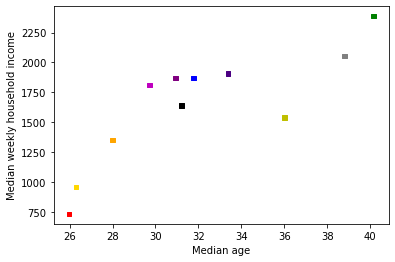

In [25]:
import matplotlib.pyplot as pl
df1.plot.scatter( x='Median age', y='Median weekly household income', color=colours, marker='s');

Using Matplotlib's ``pl.plot()`` directly, we can't pass  our colour vector in this way (although, stay tuned for the next workbook, when we revisit ``pl.scatter()``).

However, we can use a for loop to add and colour each point individually:

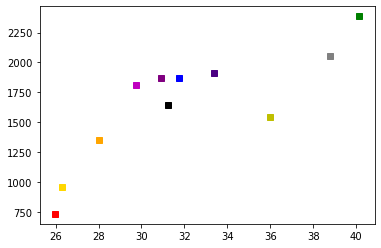

In [26]:
for ind in range(len(df1)):

    pl.plot(df1.iloc[ind]['Median age'],df1.iloc[ind]['Median weekly household income'],color=colours[ind],marker='s')
    

### Adding a Legend

This is nice, but we really need a legend to keep track of which suburb is which.

Luckily this is pretty simple. To add a legend to our plots, we need provide an appropriate label for each of our plot elements as we add them. We do this by adding the argument ``label = 'My desired label' ``  to each plotting function. 

When we are finished, we call ``pl.legend()``, and a legend is added to the figure, containing the correct labels.

Here's an example:

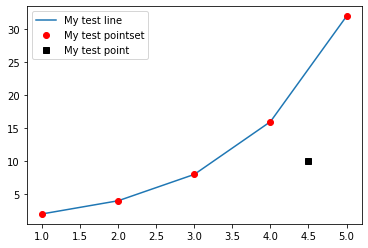

In [27]:
pl.plot(x,y, label='My test line')
pl.plot(x,y, 'ro', label='My test pointset')
pl.plot(4.5,10,'ks', label = 'My test point')
pl.legend();

Based on these examples, add a label argument to the plotting commands below, which will label each point with the corresponding 'Geography' value from ``df1``.

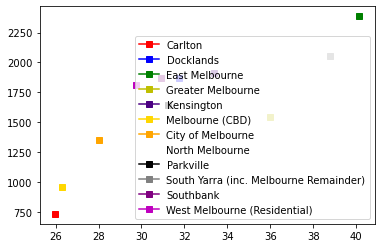

In [28]:
for ind in range(len(df1)):

    pl.plot(df1.iloc[ind]['Median age'],df1.iloc[ind]['Median weekly household income'],color=colours[ind],marker='s',label= df1.iloc[ind]['geography'] )
    
pl.legend();

Great - we have a legend. But it is blocking the whole plot.

We have a few options here. We can reduce the font size of the legend so that it becomes smaller, but that might make things hard to read. 

We can increase the size of our figure by initialising it with ``pl.figure()`` and the ``figsize`` argument, to define our desired width and height in inches. Don't forget to specify colours and labels for your markers in the cell below.

In [29]:
pl.figure(figsize = (8,8))

.....

for ind in range(len(df1)):
  
    pl.plot(df1.iloc[ind]['Median age'],df1.iloc[ind]['Median weekly household income'], ...)
    
pl.legend();


SyntaxError: invalid syntax (<ipython-input-29-062b04d94845>, line 3)

Alternatively, we can move the legend. We can pass the ``loc`` argument to ``pl.legend()`` to adjust this, using shortcuts such as 'upper left','center left','lower right'. 

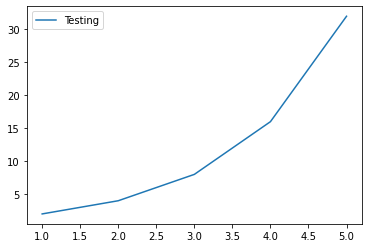

In [30]:
pl.plot(x,y,label='Testing')
    

pl.legend(loc='upper left');

However, we have finer control if we directly specify where the lower left-hand corner of the legend will go by passing a location tuple to loc. This tuple should be read as (the % right along the x axis of the legend's lower  left corner, the % up along the y axis of the legend's lower  left corner), where 100% = 1.0.

So, if we pass ``(0.5, 0.5)`` as our location, the legend will be anchored directly in the middle of the plot, with its lower left corner 50% of the way along the x axis, and 50% of the way up the y axis.

If we pass ``(0,0)``, it will be at the origin - and so on. Run some tests below:


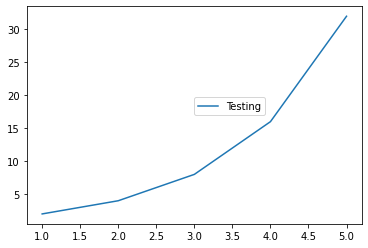

In [31]:
pl.plot(x,y,label='Testing')
    
pl.legend(loc=(0.5, 0.5));

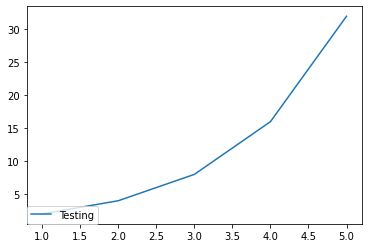

In [32]:
pl.plot(x,y,label='Testing')
    
pl.legend(loc=(0, 0));

Conveniently, by choosing a location >1 or <0, we can even move the legend beyond the confines of the plot. For example, ``(1.1, 1.1)`` would place the legend above and to the right of the plot.

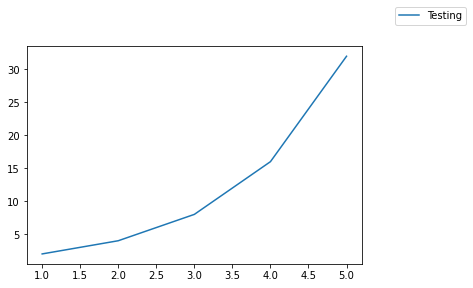

In [33]:
pl.plot(x,y,label='Testing')
    
pl.legend(loc=(1.1, 1.1));

Play around and choose some parameters to put a legend at a location you like.

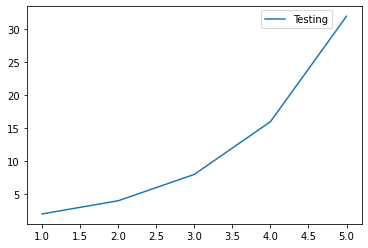

In [34]:
pl.plot(x,y,label='Testing')
    
pl.legend(loc=(0.7, 0.9));

### Exercise 1: Putting all the basics together. 

The above covers some basic essentials of plotting in Python, and introduces you to the two most essential types of visualisation - the scatter and the line plot.

To make sure you have a handle on the above, have a go at the following:

Create a figure which:
* a) shows the median age vs median weekly household income for our Melbourne suburbs as a scatter plot.
* b) Colour-code your markers by suburb.
* c) Overplot the line of best fit, using a red dot-dashed line.
* d) Add appropriate axis labels and title
* e) Size the figure to 6x6
* f) Make sure all of your scatter points (and your best fit line) are described on the legend. 
* g) Finally, write some brief remarks (just a sentence or so) about what the plot you've created shows you.

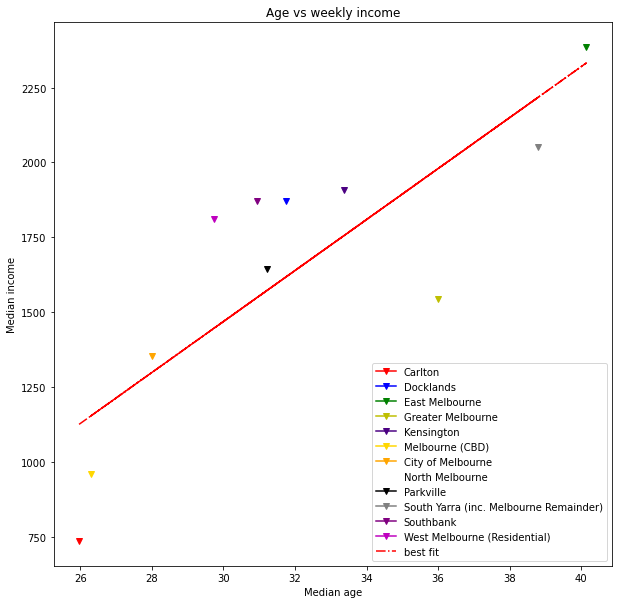

In [37]:
# Create your figure here
pl.figure(figsize = (10,10))
for ind in range (len(df1)):
    pl.plot(df1.iloc[ind]['Median age'], df1.iloc[ind]['Median weekly household income'], color=colours[ind], marker='v', label = df1.iloc[ind]['geography']); 
pl.plot(df1['Median age'], df1['Predicted income'], 'r', linestyle='-.', label='best fit')
pl.xlabel('Median age')
pl.ylabel('Median income')
pl.title('Age vs weekly income')

pl.legend()

**Well done!** You've encountered the basic tools and concepts of plotting in Python, and have hopefully learned a bit about how to use them.

#### Totally optional exercise 1.1

If you find yourself with time on your hands, here are some extra - completely optional! - tasks you can do. If you don't have time on your hands, ignore this!

* Load the CLUE data file ``CLUE_age_vs_household_income_2016.csv``
* Extract the median age and median household income data for **2011** to a dataframe
* Reproduce your last plot, but use the 2011 data, instead of the 2016 data we have used above
* Write a sentence or two about what you can learn by comparing the two plots